How do various properties of the galaxies compare with each other (in the final catalog), and how do they compare across different versions of the catalog?

In [8]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt

# Custom functions / classes
import sys
# sys.path.insert(1, '/global/u1/k/kadglass/DESI_SGA/TF/')
sys.path.insert(1, '/Users/kdouglass/Documents/Research/DESI/PV_survey/code/TF/')
# sys.path.insert(1, '/global/u1/s/sgmoore1/DESI_SGA/TF/')
from help_functions import profile_histogram

# TF catalog(s)

In [2]:
data_directory = '/Users/kdouglass/Documents/Research/data/DESI/'

v13 = Table.read(data_directory + 'Y1/DESI-DR1_TF_pv_cat_v13.fits')

v15 = Table.read(data_directory + 'Y1/DESI-DR1_TF_pv_cat_v15.fits')

# $\eta$ v. axis ratio

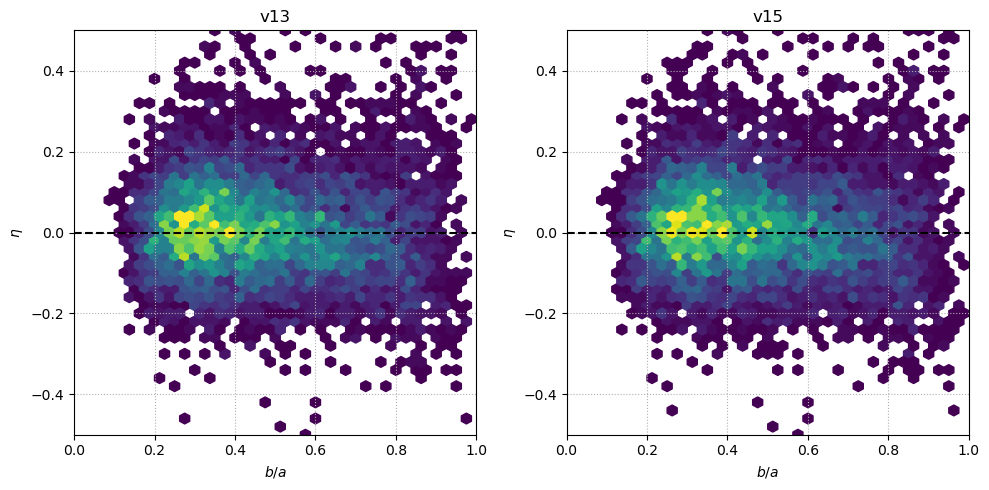

In [7]:
fig = plt.figure(figsize=(10,5), tight_layout=True)


fig.add_subplot(121)
plt.grid(ls=':')

sample = v13['MAIN']
plt.hexbin(v13['BA'][sample], 
           v13['LOGDIST'][sample], 
           cmap='viridis', 
           mincnt=1, 
           vmin=1, 
           vmax=40, 
           gridsize=(40,25), 
           extent=(0,1,-0.5,0.5))

plt.hlines(0, 0, 1, linestyles='dashed', colors='k')

plt.xlim(0, 1)
plt.ylim(-0.5, 0.5)

plt.title('v13')
plt.xlabel('$b/a$')
plt.ylabel('$\eta$')


fig.add_subplot(122)
plt.grid(ls=':')

sample = v15['MAIN']
plt.hexbin(v15['BA'][sample], 
           v15['LOGDIST'][sample], 
           cmap='viridis', 
           mincnt=1, 
           vmin=1, 
           vmax=40, 
           gridsize=(40,25), 
           extent=(0,1,-0.5,0.5))

plt.hlines(0, 0, 1, linestyles='dashed', colors='k')

plt.xlim(0, 1)
plt.ylim(-0.5, 0.5)

plt.title('v15')
plt.xlabel('$b/a$')
plt.ylabel('$\eta$');

/Users/kdouglass/Documents/Research/DESI/PV_survey/code/TF/help_functions.py:62: RuntimeWarning: invalid value encountered in divide
  h = H/W
/Users/kdouglass/Documents/Research/DESI/PV_survey/code/TF/help_functions.py:63: RuntimeWarning: divide by zero encountered in divide
  e = 1/np.sqrt(W)


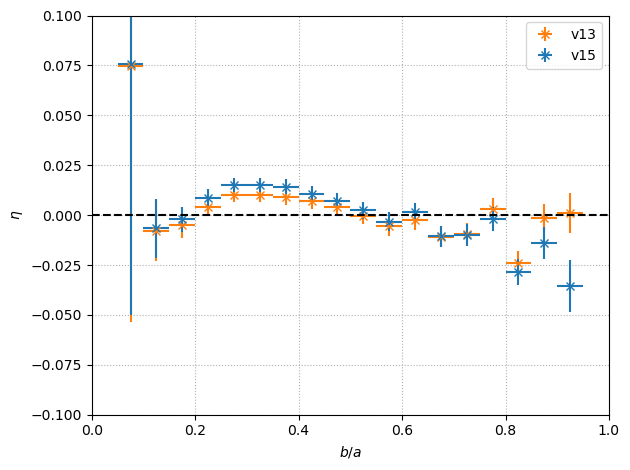

In [9]:
ba_bins = np.arange(0, 1, 0.05)
dba = 0.5*np.diff(ba_bins)
bac = 0.5*(ba_bins[1:] + ba_bins[:-1])

plt.figure(tight_layout=True)

plt.grid(ls=':')

# Plot weighted mean
sample = v13['MAIN']
_, y_avg, y_std = profile_histogram(v13['BA'][sample], 
                                    v13['LOGDIST'][sample], 
                                    ba_bins, 
                                    weights=v13['LOGDIST_ERR'][sample]**-2, 
                                    weighted=True)
plt.errorbar(bac, y_avg, xerr=dba, yerr=y_std, fmt='x', color='tab:orange', label='v13')

# Plot weighted mean
sample = v15['MAIN']
_, y_avg, y_std = profile_histogram(v15['BA'][sample], 
                                    v15['LOGDIST'][sample], 
                                    ba_bins, 
                                    weights=v15['LOGDIST_ERR'][sample]**-2, 
                                    weighted=True)
plt.errorbar(bac, y_avg, xerr=dba, yerr=y_std, fmt='x', color='tab:blue', label='v15')

plt.hlines(0, 0, 1, linestyles='dashed', colors='k', zorder=10)

plt.legend()

plt.xlim(0, 1)
plt.ylim(-0.1, 0.1)

plt.xlabel('$b/a$')
plt.ylabel('$\eta$');

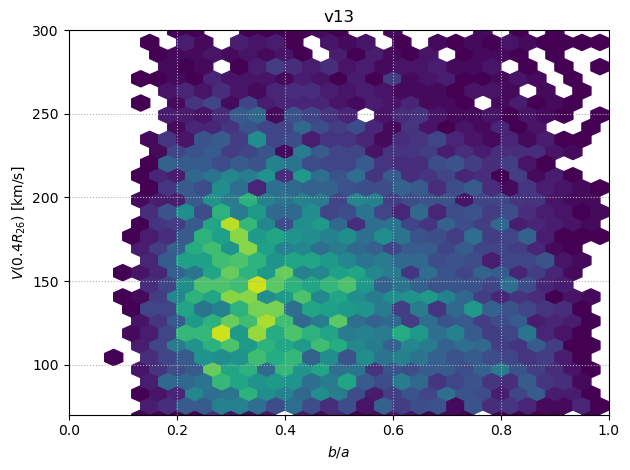

In [51]:
fig = plt.figure(tight_layout=True)#, figsize=(10,5))


# fig.add_subplot(121)
plt.grid(ls=':')

sample = v13['MAIN']
plt.hexbin(v13['BA'][sample], 
           v13['V_0p4R26'][sample], 
           cmap='viridis', 
           mincnt=1, 
           vmin=1, 
           vmax=40, 
           gridsize=(30,20), 
           extent=(0,1,10,300))

# plt.hlines(0, 0, 1, linestyles='dashed', colors='k')

plt.xlim(0, 1)
plt.ylim(70, 300)

plt.title('v13')
plt.xlabel('$b/a$')
plt.ylabel('$V(0.4R_{26})$ [km/s]')

'''
fig.add_subplot(122)
plt.grid(ls=':')

sample = v15['MAIN']
plt.hexbin(v15['BA'][sample], 
           v15['V_0p4R26'][sample], 
           cmap='viridis', 
           mincnt=1, 
           vmin=1, 
           vmax=40, 
           gridsize=(30,20), 
           extent=(0,1,10, 300))

# plt.hlines(0, 0, 1, linestyles='dashed', colors='k')

plt.xlim(0, 1)
plt.ylim(70, 300)

plt.title('v15')
plt.xlabel('$b/a$')
plt.ylabel('$V(0.4R_{26})$ [km/s]')
''';

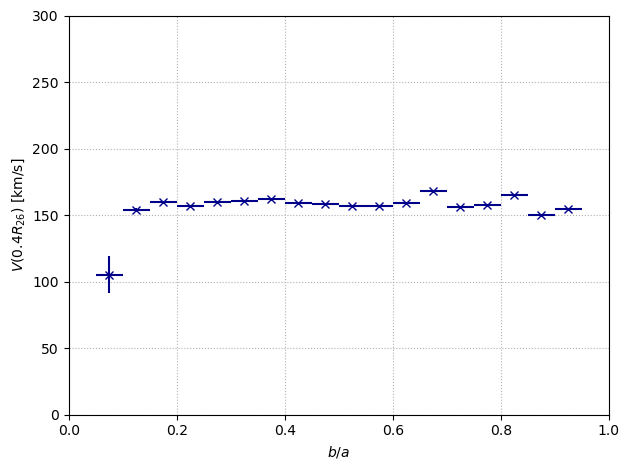

In [49]:
ba_bins = np.arange(0, 1, 0.05)
dba = 0.5*np.diff(ba_bins)
bac = 0.5*(ba_bins[1:] + ba_bins[:-1])

plt.figure(tight_layout=True)

plt.grid(ls=':')

# Plot weighted mean
sample = v13['MAIN']
_, y_avg, y_std = profile_histogram(v13['BA'][sample], 
                                    v13['V_0p4R26'][sample], 
                                    ba_bins, 
                                    weights=v13['V_0p4R26_ERR'][sample]**-2, 
                                    weighted=True)
plt.errorbar(bac, y_avg, xerr=dba, yerr=y_std, fmt='x', color='darkblue', label='v13')
'''
# Plot weighted mean
sample = v15['MAIN']
_, y_avg, y_std = profile_histogram(v15['BA'][sample], 
                                    v15['V_0p4R26'][sample], 
                                    ba_bins, 
                                    weights=v15['V_0p4R26_ERR'][sample]**-2, 
                                    weighted=True)
plt.errorbar(bac, y_avg, xerr=dba, yerr=y_std, fmt='x', color='tab:blue', label='v15')
'''
# plt.hlines(0, 0, 1, linestyles='dashed', colors='k', zorder=10)

# plt.legend()

plt.xlim(0, 1)
plt.ylim(0, 300)

plt.xlabel('$b/a$')
plt.ylabel('$V(0.4R_{26})$ [km/s]');

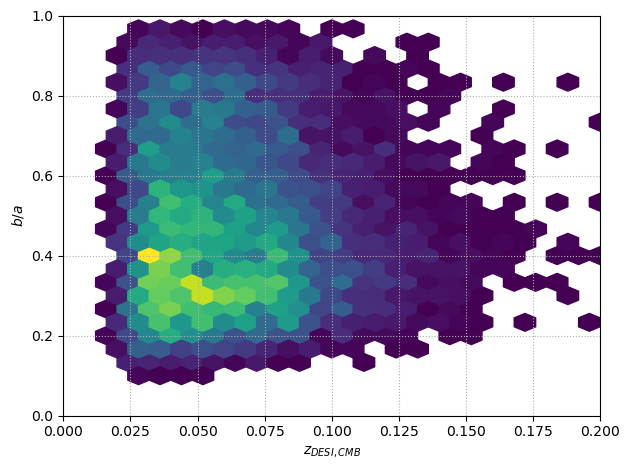

In [13]:
fig = plt.figure(tight_layout=True)

plt.grid(ls=':')

sample = v13['MAIN']
plt.hexbin(v13['Z_DESI_CMB'][sample], 
           v13['BA'][sample], 
           cmap='viridis', 
           mincnt=1, 
           vmin=1, 
           vmax=80, 
           gridsize=(25,15), 
           extent=(0,0.2,0,1))

# plt.hlines(0, 0, 1, linestyles='dashed', colors='k')

plt.xlim(0, 0.2)
plt.ylim(0, 1)

plt.xlabel('$z_{DESI, CMB}$')
plt.ylabel('$b/a$');

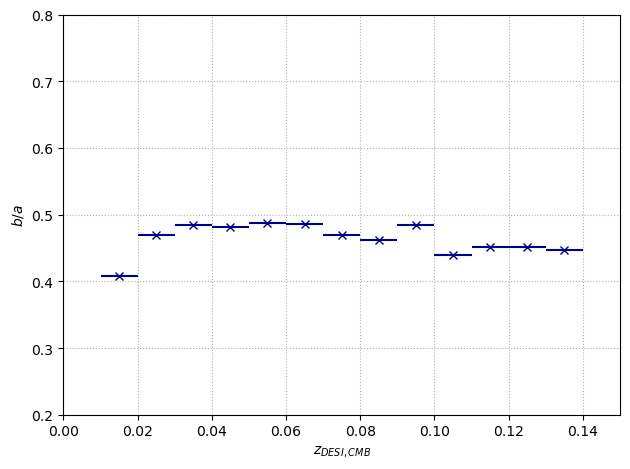

In [21]:
z_bins = np.arange(0, 0.15, 0.01)
dz = 0.5*np.diff(z_bins)
zc = 0.5*(z_bins[1:] + z_bins[:-1])

plt.figure(tight_layout=True)

plt.grid(ls=':')

# Plot weighted mean
sample = v13['MAIN']
_, y_avg, y_std = profile_histogram(v13['Z_DESI_CMB'][sample], 
                                    v13['BA'][sample], 
                                    z_bins, 
                                    weights=v13['ZERR_DESI'][sample]**-2, 
                                    weighted=True)
plt.errorbar(zc, y_avg, xerr=dz, yerr=y_std, fmt='x', color='darkblue', label='v13')

# plt.hlines(0, 0, 1, linestyles='dashed', colors='k', zorder=10)

plt.xlim(0, 0.15)
plt.ylim(0.2, 0.8)

plt.ylabel('$b/a$')
plt.xlabel('$z_{DESI, CMB}$');

# BASS v. DECALS

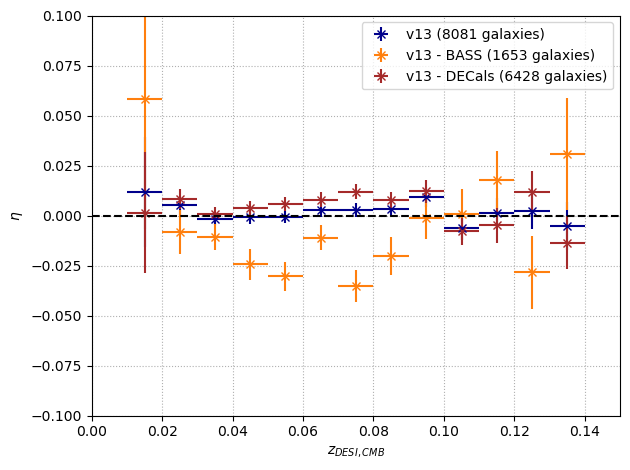

In [39]:
z_bins = np.arange(0, 0.15, 0.01)
dz = 0.5*np.diff(z_bins)
zc = 0.5*(z_bins[1:] + z_bins[:-1])

plt.figure(tight_layout=True)

plt.grid(ls=':')

# Plot weighted mean
sample = v13['MAIN']
_, y_avg, y_std = profile_histogram(v13['Z_DESI_CMB'][sample], 
                                    v13['LOGDIST'][sample], 
                                    z_bins, 
                                    weights=v13['LOGDIST_ERR'][sample]**-2, 
                                    weighted=True)
plt.errorbar(zc, y_avg, xerr=dz, yerr=y_std, fmt='x', color='darkblue', label='v13 ({:d} galaxies)'.format(sum(sample)))

sample = v13['MAIN'] & (v13['PHOTSYS'] == 'N') # BASS
_, y_avg, y_std = profile_histogram(v13['Z_DESI_CMB'][sample], 
                                    v13['LOGDIST'][sample], 
                                    z_bins, 
                                    weights=v13['LOGDIST_ERR'][sample]**-2, 
                                    weighted=True)
plt.errorbar(zc, y_avg, xerr=dz, yerr=y_std, fmt='x', color='tab:orange', label='v13 - BASS ({:d} galaxies)'.format(sum(sample)))

sample = v13['MAIN'] & (v13['PHOTSYS'] == 'S') # DECALS
_, y_avg, y_std = profile_histogram(v13['Z_DESI_CMB'][sample], 
                                    v13['LOGDIST'][sample], 
                                    z_bins, 
                                    weights=v13['LOGDIST_ERR'][sample]**-2, 
                                    weighted=True)
plt.errorbar(zc, y_avg, xerr=dz, yerr=y_std, fmt='x', color='brown', label='v13 - DECals ({:d} galaxies)'.format(sum(sample)))

'''
# Plot weighted mean
sample = v15['MAIN'] & (v15['PHOTSYS'] == 'N') # BASS
_, y_avg, y_std = profile_histogram(v15['Z_DESI_CMB'][sample], 
                                    v15['LOGDIST'][sample], 
                                    z_bins, 
                                    weights=v15['LOGDIST_ERR'][sample]**-2, 
                                    weighted=True)
plt.errorbar(zc, y_avg, xerr=dz, yerr=y_std, fmt='x', color='tab:blue', label='v15 - BASS')

sample = v15['MAIN'] & (v15['PHOTSYS'] == 'S') # DECALS
_, y_avg, y_std = profile_histogram(v15['Z_DESI_CMB'][sample], 
                                    v15['LOGDIST'][sample], 
                                    z_bins, 
                                    weights=v15['LOGDIST_ERR'][sample]**-2, 
                                    weighted=True)
plt.errorbar(zc, y_avg, xerr=dz, yerr=y_std, fmt='x', color='lightblue', label='v15 - DECals')
'''
plt.hlines(0, 0, 0.15, linestyles='dashed', colors='k', zorder=10)

plt.legend()

plt.xlim(0, 0.15)
plt.ylim(-0.1, 0.1)

plt.ylabel('$\eta$')
plt.xlabel('$z_{DESI, CMB}$');